$\textbf{Eigenvalue Problem and 1D Schrodinger Equation}$

First, start with the definition of the first derivative:
$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} $$
Next, find the first derivatives at $ x_{i+1}$ and $x_{i-1}$ using Taylor expansions around $ x_i$:
For $f(x_{i+1})$:
$$f(x_{i+1}) = f(x_i) + f'(x_i)h + \frac{f''(x_i)h^2}{2} + O(h^3) $$

For  $f(x_{i-1})$: 
$$f(x_{i-1}) = f(x_i) - f'(x_i)h + \frac{f''(x_i)h^2}{2} + O(h^3) $$

Adding these two expansions gives:
$$f(x_{i+1}) + f(x_{i-1}) = 2f(x_i) + f''(x_i)h^2 + O(h^3) $$
Now, solve for $ f''(x_i)$:
$$f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2} $$
This is the finite difference formula for the second derivative using central differencing.



let's start with the time-independent Schrödinger equation in one dimension:

$$
-\frac{{\hbar^2}}{{2m}}\frac{{d^2\psi}}{{dx^2}} + V(x)\psi = E\psi
$$
with boundary condtions $$\psi(x_0)=0 $$
$$\psi(x_{n-1})=0$$
where:

We can discretize the second derivative using the central finite difference method. Let's assume we discretize $ x $ into $ n $ points with a spacing $\Delta x $. We can denote $ x_i = i\cdot\Delta x $ for $ i=0,1,2,\ldots,n-1 $.

The second derivative can be approximated as:

$$
\frac{{d^2\psi_i}}{{dx^2}} \approx \frac{{\psi_{i+1} - 2\psi_i + \psi_{i-1}}}{{(\Delta x)^2}}
$$

Substituting this into the Schrödinger equation, we get:

$$
-\frac{{\hbar^2}}{{2m}}\frac{{\psi_{i+1} - 2\psi_i + \psi_{i-1}}}{{(\Delta x)^2}} + V(x_i)\psi_i = E\psi_i
$$

Rearranging terms, we have:

$$
-\frac{{\hbar^2}}{{2m(\Delta x)^2}}(\psi_{i+1} - 2\psi_i + \psi_{i-1}) + V(x_i)\psi_i - E\psi_i = 0
$$

$$
-\frac{{\hbar^2}}{{2m(\Delta x)^2}}\psi_{i+1} + \left(\frac{{2\hbar^2}}{{2m(\Delta x)^2}} + V(x_i)\right)\psi_i - \frac{{\hbar^2}}{{2m(\Delta x)^2}}\psi_{i-1} = E\psi_i
$$

This gives us a discretized equation for each point $ i $. We can rewrite this equation in matrix form for all $ n $ points, resulting in a tridiagonal matrix equation that can be solved numerically to find the wavefunction $\psi $ at each grid point.


Redefine $ x $ as $x/L$ and multiply through out $mL^2$ and set $\hbar =1$ 

$$
-\frac{1}{2\Delta x^2}\psi_{i+1} + \left(\frac{1}{\Delta x^2} + mL^2V(x_i)\right)\psi_i -\frac{1}{2\Delta x^2}\psi_{i-1} = mL^2E\psi_i
$$

$$-\frac{1}{{2\Delta x^2}}\psi_{2} + \left(\frac{1}{{\Delta x^2}} + mL^2V(x_1)\right)\psi_1 -\frac{1}{{2\Delta x^2}}\psi_{0} = mL^2E\psi_1 $$
$$-\frac{1}{{2\Delta x^2}}\psi_{3} + \left(\frac{1}{{\Delta x^2}} + mL^2V(x_2)\right)\psi_2 -\frac{1}{{2\Delta x^2}}\psi_{1} = mL^2E\psi_2 $$
$$-\frac{1}{{2\Delta x^2}}\psi_{4} + \left(\frac{1}{{\Delta x^2}} + mL^2V(x_3)\right)\psi_3 -\frac{1}{{2\Delta x^2}}\psi_{2} = mL^2E\psi_3 $$

$$\begin{bmatrix}
\frac{1}{\Delta x^2} + mL^2V(x_1) & -\frac{1}{2\Delta x^2} & 0 & \cdots & 0 \\
-\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2} + mL^2V(x_2) & -\frac{1}{2\Delta x^2} & \ddots & \vdots \\
0 & -\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2} + mL^2V(x_3) & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & -\frac{1}{2\Delta x^2} \\
0 & \cdots & 0 & -\frac{1}{2\Delta x^2} & \frac{1}{\Delta x^2} + mL^2V(x_{n-1})
\end{bmatrix}
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\vdots \\
\psi_{n-1}
\end{bmatrix}
=mL^2E
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\psi_3 \\
\vdots \\
\psi_{n-1}
\end{bmatrix}
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [70]:
n = 1000
dx = 1/n
x = np.linspace(0, 1, n+1)

In [71]:
def mL2V(y):
    
    mL2=500
    g=mL2*(0.5-x)**2
    return g

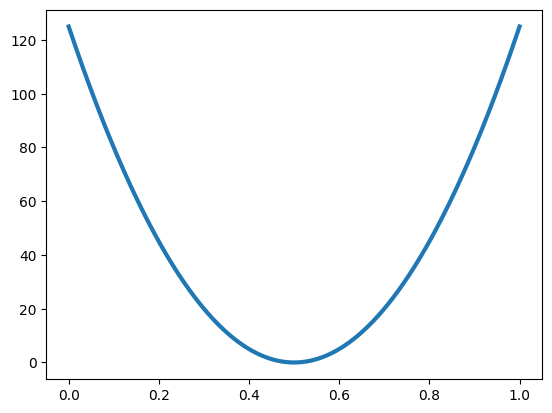

In [77]:
plt.plot(x, mL2V(x), lw=3)

In [73]:
d = 1/dx**2 + mL2V(x)[1:-1]
e = -1/(2*dx**2) * np.ones(len(d)-1)

In [74]:
w, v = eigh_tridiagonal(d, e)

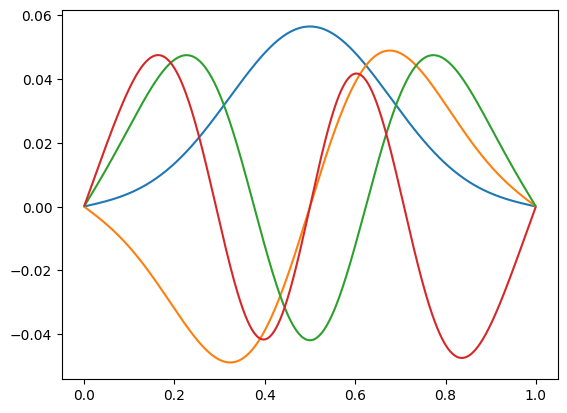

In [78]:
plt.plot(x[1:-1], v.T[0])
plt.plot(x[1:-1], v.T[1])
plt.plot(x[1:-1], v.T[2])
plt.plot(x[1:-1], v.T[3])

<BarContainer object of 10 artists>

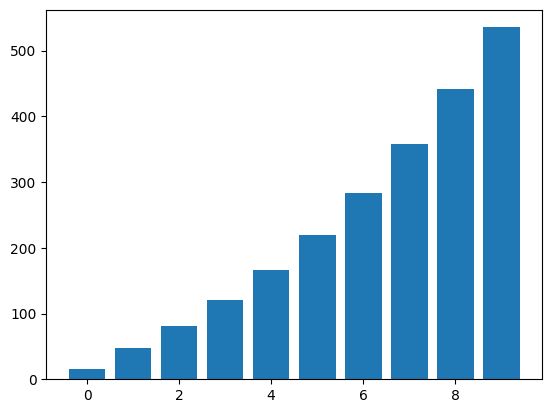

In [79]:
plt.bar(np.arange(0, 10, 1), w[0:10])